In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/home/ray__/ssd/BERT/")
sys.path.append("/home/ray__/CS/org/etherlabs/ai-engine/pkg/")
from gpt_feat_utils import GPT_Inference

gpt_model = GPT_Inference("/home/ray__/ssd/BERT/models/se/epoch3/", device="cpu")

from main import handler

with open('topic_testing/cullen_test.json','rb') as f:
    request = json.load(f)
    if isinstance(request, str):
        request = json.loads(request)
        


res = handler(request, None)
group = json.loads(res['body'])

group_sorted = {}
group_sorted ["group"] = {}
temp_group = sorted(group['group'].items(), key= lambda kv:kv[1][0]['startTime'], reverse=False)
for g in temp_group:
    group_sorted["group"][g[0]] = g[1]

group = group_sorted["group"]

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.
[nltk_data] Downloading package wordnet to /tmp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /tmp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


Using  01DAAQY88QZB19JQZ5PRJFR76Y  for feature extraction
{"level": "info", "filename": "scorer.py", "lineno": 122, "module": "scorer", "batches count": 1, "number of sentences": 92, "ts": "2020-01-03T10:02:00.123734Z", "msg": "computing in batches"}
{"level": "info", "filename": "scorer.py", "lineno": 125, "module": "scorer", "iteration count:": 0, "ts": "2020-01-03T10:02:00.124746Z", "msg": "getting feature vector"}
{"level": "info", "filename": "scorer.py", "lineno": 133, "module": "scorer", "iteration count": 0, "ts": "2020-01-03T10:02:06.699246Z", "msg": "Request Sent"}
('Kuipers magazines printed telephone directories and billboards all fall within the category of print media.', '2019-10-20T10:39:26Z', '3e1a008f734448b0ad9190778449af81', '637a142497d94900b4344dd699235d1f') ('For example, it seems that a fair amount of younger people tend to enjoy it some for the absurdity some for the entertainment some for the need to feel connected or seen in some for the almost celebrity effec

{"level": "info", "filename": "grouper_segments.py", "lineno": 1039, "module": "grouper_segments", "edges before prunning": 368, "edges after prunning": 368, "modularity": 0.7660976613936394, "ts": "2020-01-03T10:02:08.041935Z", "msg": "Meeting Graph results"}
cluster before alteration=========>
Kuipers magazines printed telephone directories and billboards all fall within the category of print media.
It is page as increased visibility translates into higher traffic that eCommerce site and an instrument.
These mechanisms may include SEO techniques, like keyword insertions backlink building and content optimization pay techniques include paid inclusion link farming content marketing.
These are not the metric shown on the program a school Facebook is growth and profits depend on the time spent by users watching ads on the platform are refining their consumer profiles the company He is directly projects from attention.
These can include solutions to encourage Mentor relationships employee

[(0, 0), (3, 0), (16, 0), (1, 1), (4, 1), (6, 1), (9, 1), (11, 1), (2, 2), (5, 2), (7, 2), (8, 3), (10, 3), (12, 3), (13, 3), (14, 4), (15, 5)]
[[['Web services or AWS provides on-demand Computing resources and services in the cloud with pay as you go go pricing. For example, you can run a server on AWS that you can log on to configure secure and run just as you would a server the sitting in front of you the whole concept Builds on top of the cloud computing principal the provides it infrastructure and them Services over the Internet because on our uses Hadoop and open source framework to manage and process data using this. That reduced engine to distribute processing using gold cluster. '], '2019-10-20T10:54:18Z', '3e1a008f734448b0ad9190778449af81', 'd2df727488294990b9503ae7b1a16695']] 


[[['LS is the software that would be installed on your personal computer or on a server. Then you would use it to manage one or more databases. The database has your actual data and the rules about t

In [3]:
import pickle
import numpy as np

# S.E
# ent_fv_full = pickle.load(open("/home/ether/hdd/ether/graph_dumps/se/se_entity_feats_v3.pkl", "rb"))
# com_map = pickle.load(open("mind_data/se/com_map_se_h_v3", "rb"))
ent_fv_full = pickle.load(open("/home/ray__/ssd/minds/se/se_entity_feats_v3.pkl", "rb"))
com_map = pickle.load(open("/home/ray__/ssd/minds/se/com_map_se_h_v3", "rb"))
    
common_entities = ent_fv_full.keys() & com_map.keys()
ent_fv = {}
for ent in common_entities:
    ent_fv[ent] = ent_fv_full[ent]

# Get Meeting data

In [4]:
import text_preprocessing.preprocess as tp
from extra_preprocess import preprocess_text
request = request["body"]
request["segments"] = sorted(request['segments'], key=lambda kv:kv['startTime'])
for index, seg in enumerate(request["segments"]):
    request["segments"][index]["originalText"] = " ".join(preprocess_text(seg["originalText"]))
segments_map = {}
for index, seg in enumerate(request["segments"]):
    if seg["originalText"] != "":
        segments_map[seg['id']] = seg
        # if len(seg["originalText"].split(". "))==1 and len(seg["originalText"].split(" "))<=6 :
        #continue
        segments_map[seg['id']]["order"] = index
text = list(map(lambda seg: (seg["originalText"], seg["id"]), [segment for segment in request['segments'] if segment["originalText"]!=""]))
seg_list = [sent for sent, id  in text]
segid_list = [id for sent, id in text]
sent_list = list(map(lambda seg, segid:([sent + ". " for sent in seg.split(". ")],segid), seg_list, segid_list))
sent_list = [(sent, segid) for seg, segid in sent_list for sent in seg]

In [8]:
# Get Segment Features

segments_fv = {}
import numpy as np
for segments in segments_map.values():
    mod_sent = preprocess_text(segments["originalText"])
    if mod_sent:
        sent_fv = list(map(lambda kv: gpt_model.get_text_feats(kv), mod_sent))
        segments_fv[segments["id"]] = np.mean(sent_fv, axis=0)

# Get segment similarity to community mind.

In [34]:
clusters_unf = {}
clusters_fv = {}
clusters = {}
for ent, cls in com_map.items():
    if cls not in clusters_unf.keys():
        clusters_unf[cls] = []
        clusters_fv[cls] = []
    clusters_unf[cls].append(ent)
    clusters_fv[cls].append(ent_fv[ent])

    
for cls, cluster in clusters_unf.items():
    if len(cluster)<=5:
        clusters_fv.pop(cls)
        continue
    else:
        clusters[cls] = cluster

In [35]:
from scipy.spatial.distance import cosine
segments_affinity = {}
for segobj in segments_map.values():
    seg_affinity = []
    for cls_index, cls_fv in clusters_fv.items():
        seg_affinity.append((cls_index, 1 - cosine(segments_fv[segobj['id']], np.mean(cls_fv))))
    segments_affinity[segobj['id']] = sorted(seg_affinity, key=lambda kv:kv[1], reverse=True)[0][0]

In [36]:
for segid, affine_cls in segments_affinity.items():
    print ("\n\nSeg text: \n\n", segments_map[segid]["originalText"], "\n\n", "MOST AFFINE Community: ", affine_cls)
    print (clusters[affine_cls][:10])



Seg text: 

 Larry has and talent management that you can focus on you can become a desirable employer being a top employer or being nominated as a great place to work are substantial investment and can be effective. Especially when you want to attract people with all kinds of effects. However, if you have a very specific employee profile, for example Engineers, your time is better spent on hiring from the top technical universities. The HR talent management model is very Helpful, in this case as it enables you to map the specific activities that you want to focus on. 

 MOST AFFINE Community:  4
['Logout', 'Gzip', 'See', 'Htpasswd', 'Plugin', 'Dashboard', 'Discover Tab', 'Mongo', 'Management Console', 'Userprofilesdk']


Seg text: 

 Kuipers magazines printed telephone directories and billboards all fall within the category of print media. Although many of these media Outlets have dwindled and Market penetration, but retain key importance with certain demographic groups, for example

In [38]:
clusters[4]

['Logout',
 'Gzip',
 'See',
 'Htpasswd',
 'Plugin',
 'Dashboard',
 'Discover Tab',
 'Mongo',
 'Management Console',
 'Userprofilesdk',
 'App Name',
 'Using',
 'Project Id',
 'Website',
 'Userid',
 'Vs',
 'Copy',
 'Description',
 'Google Console',
 'Firebase Cli',
 'Expression',
 'Import',
 'Allready',
 'Id',
 'V0',
 'Json-',
 'License',
 'Cfg',
 'Utl',
 'Site',
 'Synth',
 'System',
 '5000',
 'Stats',
 'Htmlwebpackplugin',
 '-n',
 'Apiary',
 'Py',
 'Mlab',
 'Accept',
 'Wp-',
 'Devices-ids',
 'Autowebfunction',
 'Perf',
 'Artdeco',
 'Uwsgi',
 'Add',
 'Common',
 'Mysql',
 'Webpage',
 'Tabs',
 'Resources',
 'Publicapi',
 'Instancegroup',
 'Gotchas',
 '__url__',
 'Postmans',
 'Step 2',
 'Step',
 'Mydb2',
 'Loginserver',
 '3000',
 'Catalog',
 'Flag',
 'Ascii',
 'Js File',
 'Use',
 'Webapi',
 'Pure-file',
 'Hbs',
 'Aws Sdk',
 'Lambda Code',
 'Cookie',
 'Webhook Url',
 'Documentdb',
 'Console App',
 'Mf',
 'Green',
 'Dist',
 'Uid',
 'Console',
 'Enable',
 'Sftp',
 'Jwt',
 'Gotcha',
 'Bellow',


# Do with entity as search space

In [39]:
from scipy.spatial.distance import cosine
ent_score = {}
for segid in segments_fv.keys():
    ent_score[segid] = []
    for ent in ent_fv.keys():
        ent_score[segid].append( (ent, 1 - cosine(segments_fv[segid], ent_fv[ent])))

In [40]:
keys_in_ent_score = ent_score.keys()
ent_score_sorted = {}
for segid in keys_in_ent_score:
    sorted_score = sorted(ent_score[segid], key=lambda x: x[1], reverse=True)
    ent_score_sorted[segid] = sorted_score

# Compare both

In [48]:
for segid, affine_cls in segments_affinity.items():
    print ("\n\nSeg text: \n\n", segments_map[segid]["originalText"], "\n\n", "MOST AFFINE Community: ", affine_cls)
    print ("\nSample entities form the community: ", clusters[affine_cls][:10])
    print ("\nTop 10 based on similarity and the community it picks: \n", [(i, com_map[i]) for i,j in ent_score_sorted[segid]][:10])
    #print ([com_map[ent] for ent in [i for i,j in ent_score_sorted[segid]][:10]])



Seg text: 

 Larry has and talent management that you can focus on you can become a desirable employer being a top employer or being nominated as a great place to work are substantial investment and can be effective. Especially when you want to attract people with all kinds of effects. However, if you have a very specific employee profile, for example Engineers, your time is better spent on hiring from the top technical universities. The HR talent management model is very Helpful, in this case as it enables you to map the specific activities that you want to focus on. 

 MOST AFFINE Community:  4

Sample entities form the community:  ['Logout', 'Gzip', 'See', 'Htpasswd', 'Plugin', 'Dashboard', 'Discover Tab', 'Mongo', 'Management Console', 'Userprofilesdk']

Top 10 based on similarity and the community it picks: 
 [('Tech', 17), ('Hr', 16), ('Glassdoor', 17), ('Gpa', 17), ('Marketing', 16), ('Bootcamp', 17), ('Engineering', 16), ('Companys', 15), ('Ic', 16), ('Uni', 17)]


Seg text: 

# visualization

KeyboardInterrupt: 

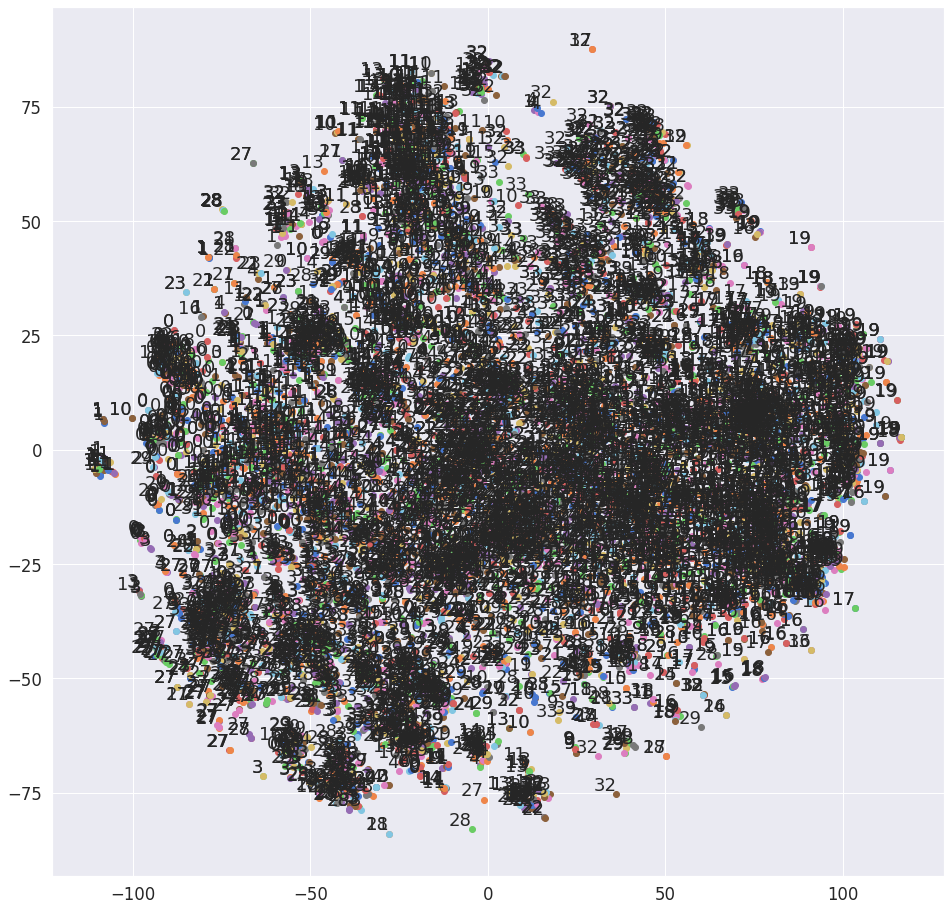

In [61]:

labels = []
tokens = []

for word in com_map.keys():
    tokens.append(ent_fv[word])
    labels.append(com_map[word])

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
#     plt.annotate(labels[i],
#                  xy=(x[i], y[i]),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom')

    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(0, 0),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

plt.show()

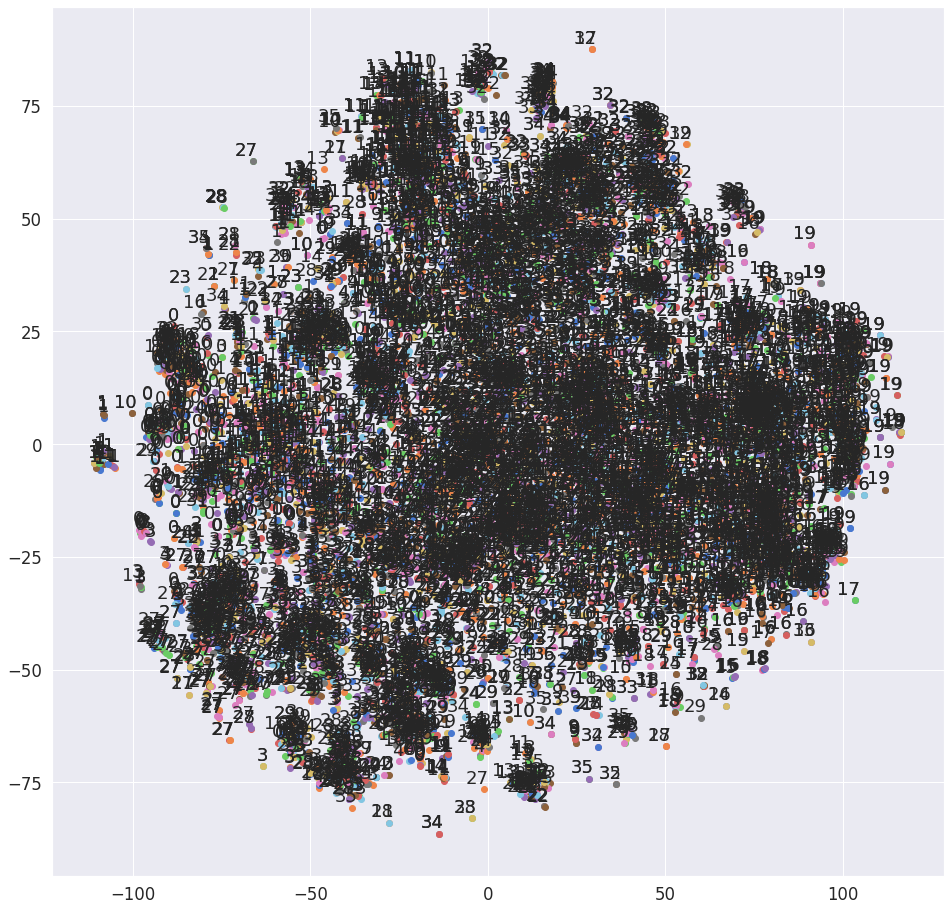

In [56]:
tsne_plot(ent_fv, com_map)

In [60]:
plt.show()